In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("data/fmnist_train.csv")

# Обработка данных


In [3]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,4,0,0,0,0,0,0,0,1,0,...,186.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,17035
17036,4,0,0,0,0,0,0,5,4,3,...,0.0,33.0,48.0,37.0,3.0,0.0,0.0,0.0,0.0,17036
17037,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17037
17038,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17038


In [4]:
# есть одна строка с пропущенными данными, удалим ее
train.dropna(inplace = True)

In [5]:
train.shape

(17039, 786)

In [29]:
X = train.drop(columns = ['label', 'Id'])


In [30]:
y = train['label']
y

0        2
1        9
2        6
3        0
4        3
        ..
17034    1
17035    4
17036    4
17037    4
17038    6
Name: label, Length: 17039, dtype: int64

In [8]:
x_pic = X.to_numpy()

In [9]:
x_pic = x_pic.reshape(-1,28,28)
x_pic.shape

(17039, 28, 28)

# Визуализация данных

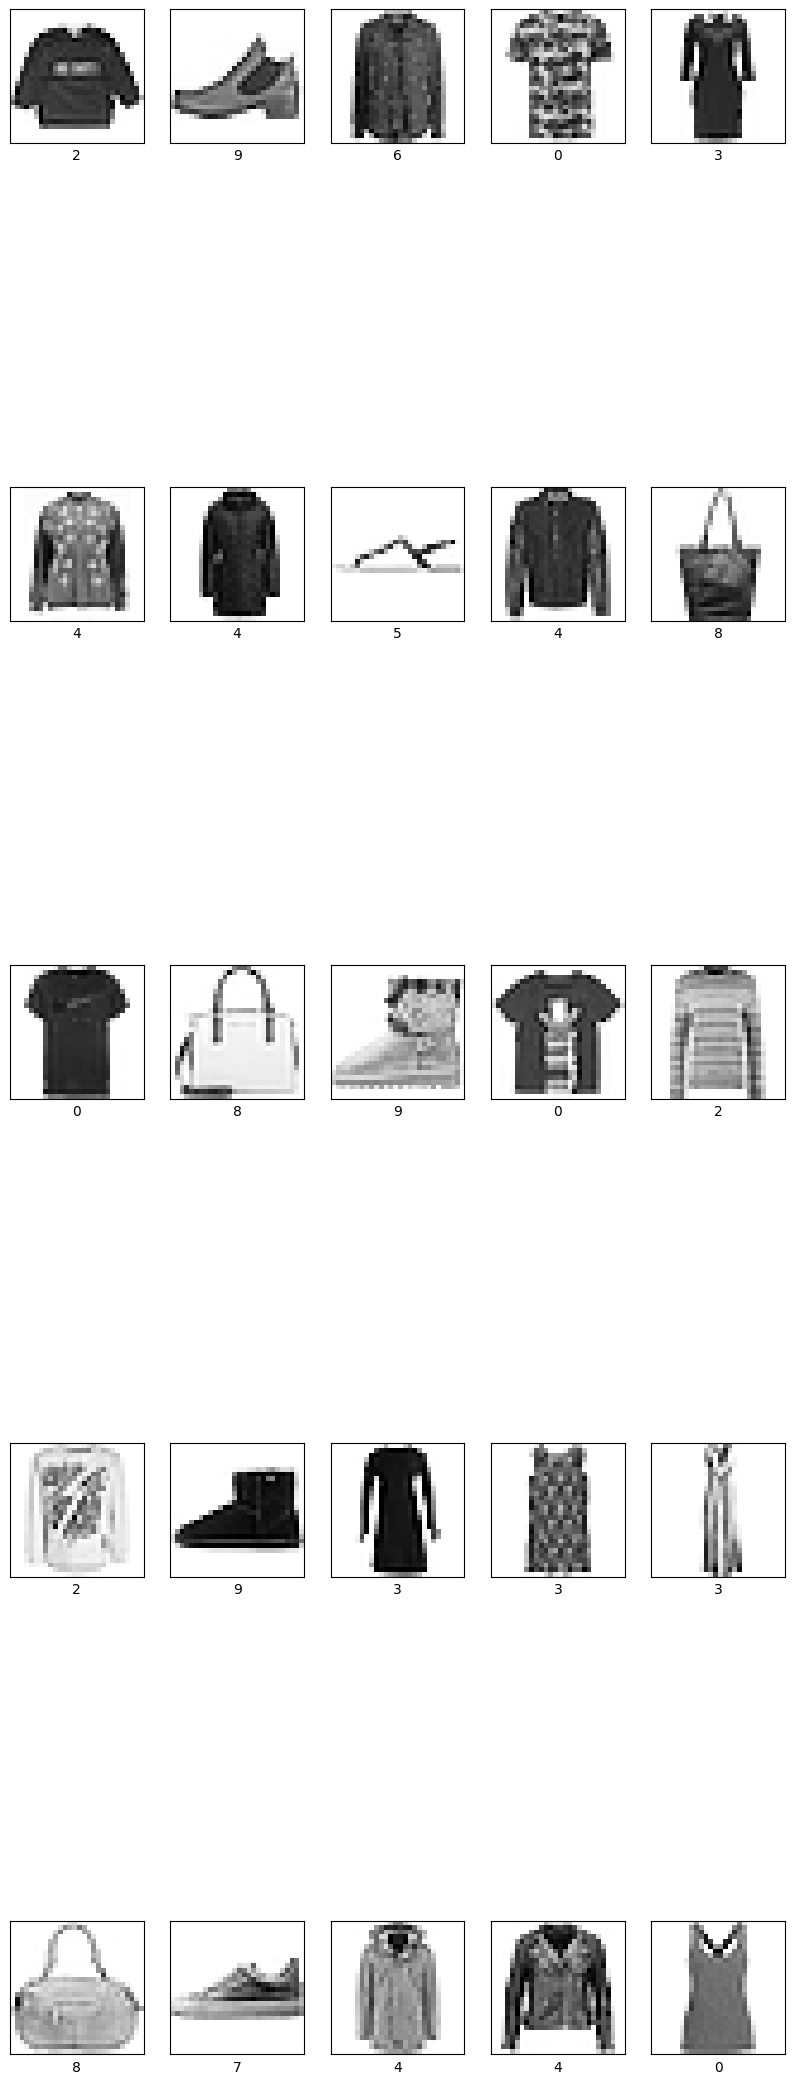

In [10]:

plt.figure(figsize=(10,30))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_pic[i], cmap="Greys")
    plt.xlabel(y[i])
plt.show()

# Создание модели

In [11]:
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [12]:
def make_default_model():
    model = M.Sequential()
    
    model.add(L.Conv2D(filters=16, activation='relu', kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    
    model.add(L.Conv2D(32, activation='relu', kernel_size=3, strides=1, padding='same'))
    model.add(BatchNormalization())
    
    model.add(L.MaxPool2D()) 
    
    model.add(L.Dropout(rate=0.25))
    
    model.add(L.Conv2D(32, activation='relu', kernel_size=3, strides=1, padding='same')) 
    model.add(BatchNormalization())
    
    model.add(L.Conv2D(32, activation='relu', kernel_size=3, strides=1, padding='same')) 
    model.add(BatchNormalization())
    
    model.add(L.MaxPool2D())
    
    model.add(L.Dropout(rate=0.25))
      
    model.add(L.Flatten()) 
    model.add(L.Dense(256, activation='relu',))
    model.add(BatchNormalization())
    model.add(L.Dropout(rate=0.25))
    model.add(L.Dense(10, activation='softmax'))
    return model

In [13]:
model = make_default_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [14]:
def train_model(make_model_func=make_default_model, optimizer="adam"):
    BATCH_SIZE = 32
    EPOCHS = 20

    K.clear_session()
    model = make_model_func()

    model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

  
    
    model.fit(
    x_train, y_train,  # нормализованные данные
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    shuffle=False)
    
  
    return model

# Оценка модели

In [15]:
mean_accuracy = 0
for i in range(1,27,5):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    x_train = x_train.reshape(-1,28,28)
    x_test = x_test.reshape(-1,28,28)

    # центрируем и нормируем, так сети будет проще учиться (позже узнаем почему :)
    x_train = x_train.astype(np.float) / 255 - 0.5
    x_test = x_test.astype(np.float) / 255 - 0.5

    # конвертируем метки в np.array (?, NUM_CLASSES)
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    model = train_model()
    y_pred = model.predict(x_test)
    classes_x=np.argmax(y_pred,axis=1)
    classes_x = keras.utils.to_categorical(classes_x, 10)
    accuracy_score(y_test, classes_x)
    mean_accuracy+=accuracy_score(y_test, classes_x)


C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = x_train.astype(np.float) / 255 - 0.5
C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = x_test.astype(np.float) / 255 - 0.5


Epoch 1/20
357/357 [==============================] - 21s 55ms/step - loss: 0.6495 - accuracy: 0.7691 - val_loss: 1.4854 - val_accuracy: 0.5568
Epoch 2/20
357/357 [==============================] - 20s 56ms/step - loss: 0.4468 - accuracy: 0.8412 - val_loss: 0.3841 - val_accuracy: 0.8624
Epoch 3/20
357/357 [==============================] - 18s 50ms/step - loss: 0.3694 - accuracy: 0.8676 - val_loss: 0.3268 - val_accuracy: 0.8848
Epoch 4/20
357/357 [==============================] - 20s 55ms/step - loss: 0.3228 - accuracy: 0.8817 - val_loss: 0.2928 - val_accuracy: 0.8935
Epoch 5/20
357/357 [==============================] - 19s 54ms/step - loss: 0.2892 - accuracy: 0.8963 - val_loss: 0.2962 - val_accuracy: 0.8970
Epoch 6/20
357/357 [==============================] - 19s 53ms/step - loss: 0.2745 - accuracy: 0.8975 - val_loss: 0.2849 - val_accuracy: 0.9020
Epoch 7/20
357/357 [==============================] - 19s 54ms/step - loss: 0.2455 - accuracy: 0.9088 - val_loss: 0.2763 - val_accuracy:

C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = x_train.astype(np.float) / 255 - 0.5
C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = x_test.astype(np.float) / 255 - 0.5


Epoch 1/20
357/357 [==============================] - 21s 56ms/step - loss: 0.6713 - accuracy: 0.7668 - val_loss: 1.7113 - val_accuracy: 0.5408
Epoch 2/20
357/357 [==============================] - 19s 53ms/step - loss: 0.4385 - accuracy: 0.8396 - val_loss: 0.3907 - val_accuracy: 0.8579
Epoch 3/20
357/357 [==============================] - 19s 54ms/step - loss: 0.3713 - accuracy: 0.8652 - val_loss: 0.3510 - val_accuracy: 0.8750
Epoch 4/20
357/357 [==============================] - 19s 54ms/step - loss: 0.3285 - accuracy: 0.8806 - val_loss: 0.3502 - val_accuracy: 0.8698
Epoch 5/20
357/357 [==============================] - 19s 54ms/step - loss: 0.3069 - accuracy: 0.8902 - val_loss: 0.3263 - val_accuracy: 0.8832
Epoch 6/20
357/357 [==============================] - 19s 54ms/step - loss: 0.2770 - accuracy: 0.8962 - val_loss: 0.3078 - val_accuracy: 0.8956
Epoch 7/20
357/357 [==============================] - 19s 54ms/step - loss: 0.2569 - accuracy: 0.9050 - val_loss: 0.3186 - val_accuracy:

C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = x_train.astype(np.float) / 255 - 0.5
C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = x_test.astype(np.float) / 255 - 0.5


Epoch 1/20
357/357 [==============================] - 20s 54ms/step - loss: 0.6739 - accuracy: 0.7653 - val_loss: 1.9630 - val_accuracy: 0.4402
Epoch 2/20
357/357 [==============================] - 19s 53ms/step - loss: 0.4542 - accuracy: 0.8358 - val_loss: 0.4120 - val_accuracy: 0.8476
Epoch 3/20
357/357 [==============================] - 19s 54ms/step - loss: 0.3800 - accuracy: 0.8618 - val_loss: 0.3672 - val_accuracy: 0.8645
Epoch 4/20
357/357 [==============================] - 19s 52ms/step - loss: 0.3364 - accuracy: 0.8776 - val_loss: 0.3233 - val_accuracy: 0.8808
Epoch 5/20
357/357 [==============================] - 20s 56ms/step - loss: 0.3081 - accuracy: 0.8882 - val_loss: 0.3138 - val_accuracy: 0.8839
Epoch 6/20
357/357 [==============================] - 18s 49ms/step - loss: 0.2833 - accuracy: 0.8943 - val_loss: 0.3146 - val_accuracy: 0.8869
Epoch 7/20
357/357 [==============================] - 21s 58ms/step - loss: 0.2627 - accuracy: 0.9012 - val_loss: 0.3395 - val_accuracy:

C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = x_train.astype(np.float) / 255 - 0.5
C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = x_test.astype(np.float) / 255 - 0.5


Epoch 1/20
357/357 [==============================] - 24s 64ms/step - loss: 0.6592 - accuracy: 0.7710 - val_loss: 1.7229 - val_accuracy: 0.4857
Epoch 2/20
357/357 [==============================] - 18s 50ms/step - loss: 0.4333 - accuracy: 0.8421 - val_loss: 0.3481 - val_accuracy: 0.8723
Epoch 3/20
357/357 [==============================] - 18s 50ms/step - loss: 0.3733 - accuracy: 0.8639 - val_loss: 0.3200 - val_accuracy: 0.8817
Epoch 4/20
357/357 [==============================] - 18s 51ms/step - loss: 0.3233 - accuracy: 0.8828 - val_loss: 0.3186 - val_accuracy: 0.8808
Epoch 5/20
357/357 [==============================] - 19s 53ms/step - loss: 0.2978 - accuracy: 0.8935 - val_loss: 0.2948 - val_accuracy: 0.8928
Epoch 6/20
357/357 [==============================] - 18s 51ms/step - loss: 0.2640 - accuracy: 0.9022 - val_loss: 0.2734 - val_accuracy: 0.8970
Epoch 7/20
357/357 [==============================] - 20s 57ms/step - loss: 0.2431 - accuracy: 0.9081 - val_loss: 0.2775 - val_accuracy:

C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = x_train.astype(np.float) / 255 - 0.5
C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = x_test.astype(np.float) / 255 - 0.5


Epoch 1/20
357/357 [==============================] - 24s 63ms/step - loss: 0.6609 - accuracy: 0.7678 - val_loss: 1.4636 - val_accuracy: 0.4916
Epoch 2/20
357/357 [==============================] - 22s 60ms/step - loss: 0.4446 - accuracy: 0.8398 - val_loss: 0.3860 - val_accuracy: 0.8567
Epoch 3/20
357/357 [==============================] - 22s 61ms/step - loss: 0.3660 - accuracy: 0.8664 - val_loss: 0.3511 - val_accuracy: 0.8728
Epoch 4/20
357/357 [==============================] - 22s 63ms/step - loss: 0.3219 - accuracy: 0.8826 - val_loss: 0.3293 - val_accuracy: 0.8833
Epoch 5/20
357/357 [==============================] - 22s 63ms/step - loss: 0.3027 - accuracy: 0.8869 - val_loss: 0.3540 - val_accuracy: 0.8723
Epoch 6/20
357/357 [==============================] - 22s 62ms/step - loss: 0.2635 - accuracy: 0.9037 - val_loss: 0.3094 - val_accuracy: 0.8880
Epoch 7/20
357/357 [==============================] - 23s 64ms/step - loss: 0.2492 - accuracy: 0.9081 - val_loss: 0.3160 - val_accuracy:

C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = x_train.astype(np.float) / 255 - 0.5
C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\3280164267.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = x_test.astype(np.float) / 255 - 0.5


Epoch 1/20
357/357 [==============================] - 23s 61ms/step - loss: 0.6682 - accuracy: 0.7652 - val_loss: 1.2968 - val_accuracy: 0.4759
Epoch 2/20
357/357 [==============================] - 27s 75ms/step - loss: 0.4630 - accuracy: 0.8343 - val_loss: 0.3950 - val_accuracy: 0.8599
Epoch 3/20
357/357 [==============================] - 21s 58ms/step - loss: 0.3912 - accuracy: 0.8573 - val_loss: 0.3751 - val_accuracy: 0.8624
Epoch 4/20
357/357 [==============================] - 22s 61ms/step - loss: 0.3484 - accuracy: 0.8694 - val_loss: 0.3647 - val_accuracy: 0.8675
Epoch 5/20
357/357 [==============================] - 29s 81ms/step - loss: 0.3074 - accuracy: 0.8863 - val_loss: 0.3142 - val_accuracy: 0.8878
Epoch 6/20
357/357 [==============================] - 15s 42ms/step - loss: 0.2873 - accuracy: 0.8939 - val_loss: 0.3044 - val_accuracy: 0.8917
Epoch 7/20
357/357 [==============================] - 20s 55ms/step - loss: 0.2590 - accuracy: 0.9047 - val_loss: 0.3084 - val_accuracy:

In [16]:
print(mean_accuracy/6) 

0.9047068587349575


# Обучение модели

In [35]:
X = train.drop(columns = ['label', 'Id'])
y = train['label']

In [ ]:
X = X.to_numpy()
y = y.to_numpy()
X = X.reshape(-1,28,28)
X = X.astype(np.float) / 255 - 0.5
y = keras.utils.to_categorical(y, 10)

In [31]:
print(X.shape)
print(y.shape)

(17039, 784)
(17039,)


In [36]:
K.clear_session()
model = make_default_model()

model.compile(
loss='categorical_crossentropy',
optimizer="adam",
metrics=['accuracy'])
    
model.fit(
X, y,  # нормализованные данные
batch_size=32,
epochs=20,
shuffle=False)

    

C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\1163753162.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = X.astype(np.float) / 255 - 0.5


Epoch 1/20
533/533 [==============================] - 37s 66ms/step - loss: 0.6087 - accuracy: 0.7867
Epoch 2/20
533/533 [==============================] - 36s 67ms/step - loss: 0.4087 - accuracy: 0.8523
Epoch 3/20
533/533 [==============================] - 38s 72ms/step - loss: 0.3458 - accuracy: 0.8746
Epoch 4/20
533/533 [==============================] - 39s 73ms/step - loss: 0.3051 - accuracy: 0.8886
Epoch 5/20
533/533 [==============================] - 40s 75ms/step - loss: 0.2811 - accuracy: 0.8963
Epoch 6/20
533/533 [==============================] - 39s 74ms/step - loss: 0.2549 - accuracy: 0.9059
Epoch 7/20
533/533 [==============================] - 36s 67ms/step - loss: 0.2400 - accuracy: 0.9113
Epoch 8/20
533/533 [==============================] - 32s 59ms/step - loss: 0.2216 - accuracy: 0.9172
Epoch 9/20
533/533 [==============================] - 22s 41ms/step - loss: 0.2055 - accuracy: 0.9235
Epoch 10/20
533/533 [==============================] - 40s 74ms/step - loss: 0.190

# Предсказание на fmnist_test

In [46]:
# Пример предсказания
example = pd.read_csv("data/sample_submission.csv")
example.head(50)

,Id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [40]:
validate = pd.read_csv("data/fmnist_test.csv")
validate = validate.drop(columns = ['Id'])
validate

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
validate = validate.to_numpy()
validate = validate.reshape(-1,28,28)
validate = validate.astype(np.float) / 255 - 0.5

C:\Users\ledne\AppData\Local\Temp\ipykernel_35584\2303347590.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  validate = validate.astype(np.float) / 255 - 0.5


In [42]:
val_pred = model.predict(validate)

313/313 [==============================] - 8s 26ms/step


In [43]:
classes_x=np.argmax(val_pred,axis=1)
classes_x = keras.utils.to_categorical(classes_x, 10)

In [45]:
classes_x

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [86]:
pred = pd.DataFrame(classes_x)

In [87]:
pred

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [88]:
pred = pred.idxmax(1)

In [89]:
pred

0       0
1       1
2       2
3       6
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Length: 10000, dtype: int64

In [90]:
type(pred)

pandas.core.series.Series

In [91]:
pred = pd.DataFrame(data=pred, columns=['Category'])

In [92]:
pred

,Category
0,0
1,1
2,2
3,6
4,3
...,...
9995,0
9996,6
9997,8
9998,8


In [93]:
pred.to_csv('result_lednevavv.csv', index=True, index_label = "Id")

In [94]:
result_lednevavv = pd.read_csv("result_lednevavv.csv")
result_lednevavv

,Id,Category
0,0,0
1,1,1
2,2,2
3,3,6
4,4,3
...,...,...
9995,9995,0
9996,9996,6
9997,9997,8
9998,9998,8


In [52]:
example

,Id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
9995,9995,0
9996,9996,0
9997,9997,0
9998,9998,0
